# 只有稀疏训练保存每轮ssf参数 (50,100,200)
1. PATH='/data/datasets/zxy/saver/50/'
2. PATH='/data/datasets/zxy/saver/100/'
3. PATH='/data/datasets/zxy/saver/200/'  

#### 文件格式：pkl文件读取后返回二维数组
 - 第一维是 ssf_scale {name,data}键值对
 - 第二维是 ssf_shift {name,data}键值对

In [ ]:
import pickle
def msaver(model,epoch=0):
    ssf_scale,ssf_shift={},{}
    lss=[]
    for name, para in model.named_parameters():
        if "ssf_scale" in name:
            ssf_scale[name]=para.data.detach().cpu().numpy()
        elif "ssf_shift" in name:
            ssf_shift[name]=para.data.detach().cpu().numpy()
    lss.append(ssf_scale)
    lss.append(ssf_shift)
    print(len(lss[0]))
    with open(str(epoch)+'.pkl', 'wb') as f:
	    pickle.dump(lss, f)

msaver(model)

In [6]:
PATH='/data/datasets/zxy/saver/50/'

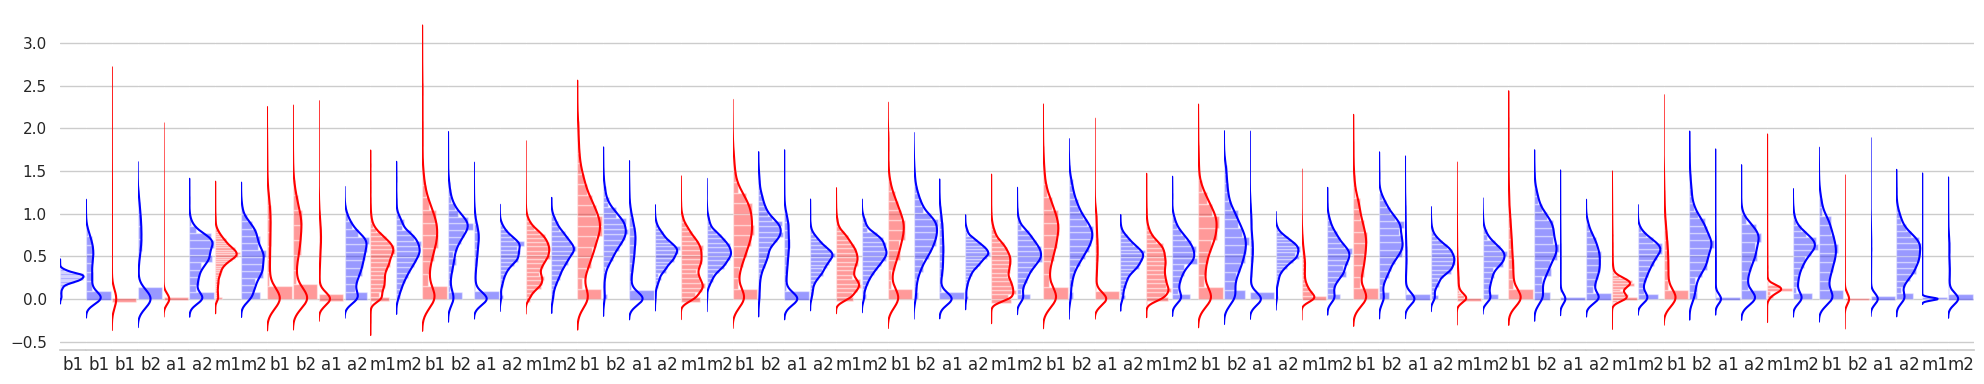

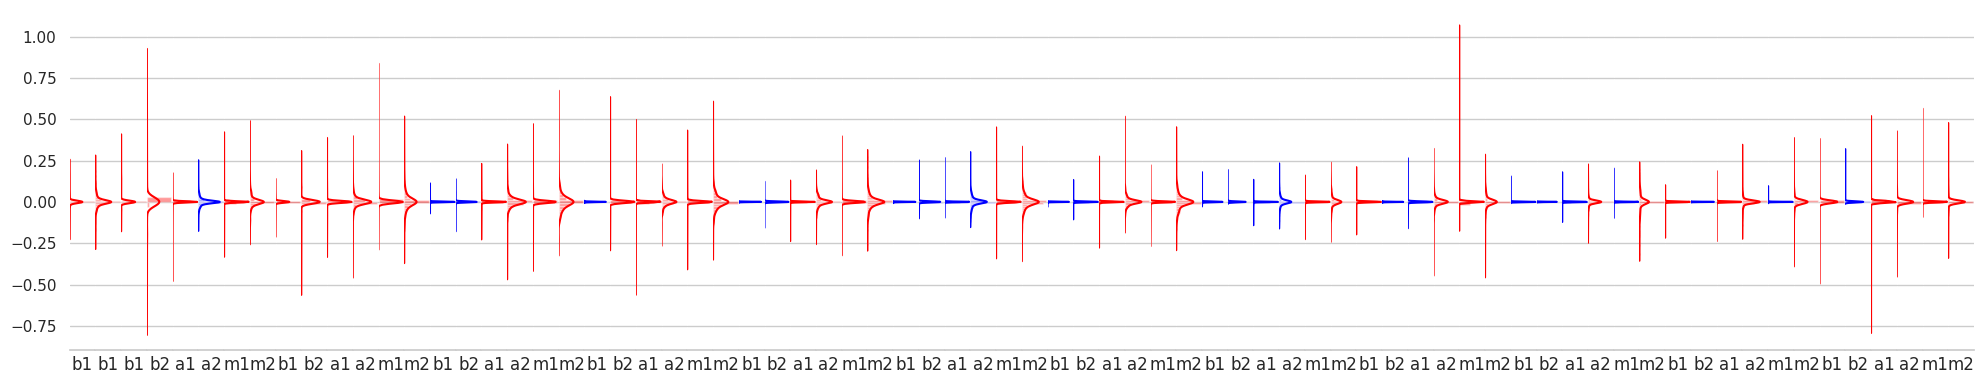

MAX Scale:  2.8331826
MIN Scale:  -0.27625865
MAX Shift:  1.0553958
MIN Shift:  -0.7758739


In [13]:
PATH='/data/datasets/zxy/saver/50/'
# PATH='/data/datasets/zxy/saver/100/'
# PATH='/data/datasets/zxy/saver/200/'                            
                             

import pickle
import warnings
warnings. filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def mreader(epoch=1,path=PATH):
    ssf_scale_list,ssf_shift_list,ssf_scale_name,ssf_shift_name=[],[],[],[]
    with open(path+str(epoch)+'.pkl', 'rb') as f:
	    a = pickle.load(f)
    # ssf_scale=a[0]
    # ssf_shift=a[1]
    for k,v in a[0].items():
        ssf_scale_name.append(k)
        ssf_scale_list.append(v)
    for k,v in a[1].items():
        ssf_shift_name.append(k)
        ssf_shift_list.append(v)
    return ssf_scale_list,ssf_shift_list,ssf_scale_name,ssf_shift_name

# ssf_scale_list,ssf_shift_list,ssf_scale_name,ssf_shift_name=mreader(1)

def draw6(row1,name=None):
    data=row1
    arr = data
    up_mean=np.mean(np.array([a.max() for a in arr]))
    lw_mean=np.mean(np.array([a.min() for a in arr]))
    num_rows = len(arr)
    fig, axs = plt.subplots(ncols=num_rows, nrows=1, sharey=True,gridspec_kw={"hspace": 0, "wspace": 0})
    fig.set_size_inches(20, 4)
    lw=lw_mean*1.5 if lw_mean<0 else lw_mean*0.5
    ran=(lw,up_mean*1.5)
    ran=(lw,up_mean*1.5)
    for i in range(num_rows):
        # sns.histplot(y=arr[i], ax=axs[i], kde=True, stat="density")
        # sns.distplot(arr[i], ax=axs[i], kde=True, stat="density",hist_kws={'range': (0.0, 0.2)})
        color="blue"
        if arr[i].max() > up_mean*1.2 or arr[i].min() < lw_mean*0.8:
            color="red"
        sns.distplot(arr[i], ax=axs[i], kde=True, vertical=True,color=color)
        # sns.distplot(arr[i], ax=axs[i], kde=True, vertical=True,color=color,\
        #     hist_kws={'range': ran},kde_kws={'clip': ran})
        # sns.histplot(data, clip=(0, 10))
        axs[i].set_xticks([])
        # axs[i].set_xlabel(f"{i+1}")
        label=""
        if 'attn' in name[i]:
            label+="a"
        elif 'mlp' in name[i]:
            label+="m"
        else:
            label+="b"
        label+=name[i].split("_")[-1]
        axs[i].set_xlabel(label)
    plt.tight_layout()
    # sns.set_style('white')
    sns.set(style='whitegrid')
    sns.despine(right=True,left=True)
    plt.show()

def read_draw(epoch=1):
    ssf_scale_list,ssf_shift_list,ssf_scale_name,ssf_shift_name=mreader(epoch)
    draw6(ssf_scale_list,ssf_scale_name)
    draw6(ssf_shift_list,ssf_shift_name)
    print("MAX Scale: ", max([s.max() for s in ssf_scale_list]))
    print("MIN Scale: ", min([s.min() for s in ssf_scale_list]))
    print("MAX Shift: ", max([s.max() for s in ssf_shift_list]))
    print("MIN Shift: ", min([s.min() for s in ssf_shift_list]))

read_draw(50)
